In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

### Phase1: Election 16 vs Election 20

In [33]:
elec16 = pd.read_csv("train/phase1/election16.csv")  
elec20 = pd.read_csv("train/phase1/election20.csv")  

In [79]:
elec16['date'] = elec16.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').date(), axis=1)        
elec20['date'] = elec20.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').date(), axis=1)        

In [78]:
elec20.head()

,time,text,target,date
0,Mon Aug 17 18:31:45 +0000 2020,RT @DemConvention: We've always risen to our c...,3,2020-08-17
1,Mon Aug 17 18:40:59 +0000 2020,RT @kleavitt: @monacharenEPPC @MaxBoot Part of...,1,2020-08-17
2,Mon Aug 17 18:56:49 +0000 2020,RT @EricTrump: .@realDonaldTrump Boat Parade t...,2,2020-08-17
3,Mon Aug 17 18:19:23 +0000 2020,RT @realDonaldTrump: Getting ready to land in ...,3,2020-08-17
4,Mon Aug 17 18:52:43 +0000 2020,about mail in vs absentee voting is a lie. \nT...,1,2020-08-17


In [37]:
mean_elec16 = elec16.groupby('date').mean()  
mean_elec20 = elec20.groupby('date').mean() 

In [16]:
mean_elec20

,target
date,
2020-08-17,2.192308
2020-08-18,1.917808
2020-08-19,1.948718
2020-08-20,1.932432
2020-08-24,1.652778
2020-08-25,1.933333
2020-08-26,1.676471
2020-08-27,1.890411
2020-09-28,1.740260


In [89]:
elec16_v2 = pd.read_csv("train/phase1/election16.csv")  
elec20_v2 = pd.read_csv("train/phase1/election20.csv")  

In [90]:
elec16_v2['date'] = elec16_v2.apply(lambda row: int(datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').month), axis=1)        
elec20_v2['date'] = elec20_v2.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').month, axis=1)        

In [131]:
elec16_means = []
elec16_means.append(elec16_v2[elec16_v2['date'] == 7]['target'].mean())
elec16_means.append(elec16_v2[[d in [9, 10] for d in elec16_v2['date']]]['target'].mean())

In [132]:
elec20_means = []
elec20_means.append(elec20_v2[[d in [7, 8] for d in elec20_v2['date']]]['target'].mean())
elec20_means.append(elec20_v2[[d in [9, 10] for d in elec20_v2['date']]]['target'].mean())

In [133]:
elec16_means

[1.910828025477707, 1.9340836012861737]

In [134]:
elec20_means

[1.898477157360406, 1.9222065063649223]

In [86]:
mean_elec20_v2 = elec20_v2.groupby('date').mean()

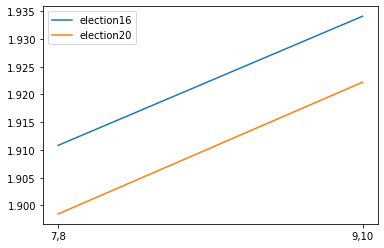

In [140]:
plt.plot(['7,8', '9,10'], elec16_means, label='election16')
plt.plot(['7,8', '9,10'], elec20_means, label='election20')
plt.legend()

### Phase1: Covid Canada vs Covid US

In [145]:
cvd_ca = pd.read_csv("train/phase1/Covid_CA_new.csv")  
cvd_us = pd.read_csv("train/phase2/Covid_US.csv")  

In [146]:
cvd_ca.head()

,time,text,target
0,Sat Mar 28 15:29:44 +0000 2020,Conrad Black on COVID-19: The world succumbed ...,1
1,Sat Mar 28 15:29:34 +0000 2020,In this disaster lies an opportunity to reflec...,1
2,Sat Mar 28 15:28:18 +0000 2020,"On Friday, an employee from the Steeles Ave We...",3
3,Sat Mar 28 15:27:55 +0000 2020,Best not to go to the White House. It is proba...,1
4,Sat Mar 28 15:27:33 +0000 2020,Coronavirus updates: LCBO employee tests posit...,1


In [147]:
cvd_us.head()

,time,text,target
0,Mon Aug 17 18:02:35 +0000 2020,RT @NeetJeePospone: ⚠️【 SOP EXPOSED 】⚠️\n●LOCA...,0
1,Mon Aug 17 18:21:39 +0000 2020,"RT @yinonw: Similarly, Germany's coronavirus ""...",3
2,Mon Aug 17 18:04:10 +0000 2020,RT @HassanPeppe: Karasuwa local government ins...,3
3,Mon Aug 17 18:01:21 +0000 2020,@Chrisar26375059 Am jealous haven't seen my fa...,3
4,Mon Aug 17 18:22:34 +0000 2020,"RT @BrandonStraka: No, you don’t have to stay ...",0


In [153]:
cvd_ca['date'] = cvd_ca.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').month, axis=1)        
cvd_us['date'] = cvd_us.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').month, axis=1)        

In [154]:
cvd_us.head()

,time,text,target,date
0,Mon Aug 17 18:02:35 +0000 2020,RT @NeetJeePospone: ⚠️【 SOP EXPOSED 】⚠️\n●LOCA...,0,8
1,Mon Aug 17 18:21:39 +0000 2020,"RT @yinonw: Similarly, Germany's coronavirus ""...",3,8
2,Mon Aug 17 18:04:10 +0000 2020,RT @HassanPeppe: Karasuwa local government ins...,3,8
3,Mon Aug 17 18:01:21 +0000 2020,@Chrisar26375059 Am jealous haven't seen my fa...,3,8
4,Mon Aug 17 18:22:34 +0000 2020,"RT @BrandonStraka: No, you don’t have to stay ...",0,8


In [155]:
cvd_ca['date'].unique()

array([ 3,  4,  6,  7, 10, 11])

In [156]:
cvd_us['date'].unique()

array([ 8,  9, 10])

In [159]:
ca_mean = cvd_ca.groupby('date').mean()

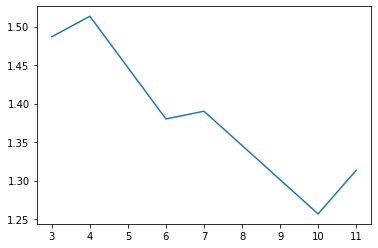

In [161]:
plt.plot(ca_mean)

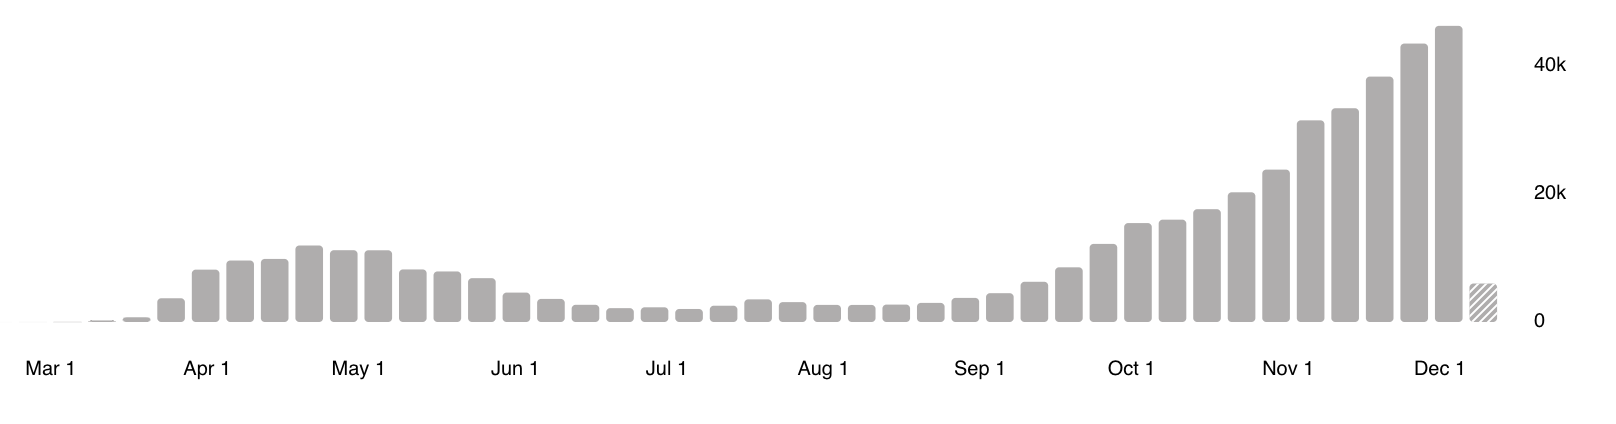

In [164]:
from PIL import Image
Image.open('canada_covid_stat.png')

In [165]:
us_mean = cvd_us.groupby('date').mean()

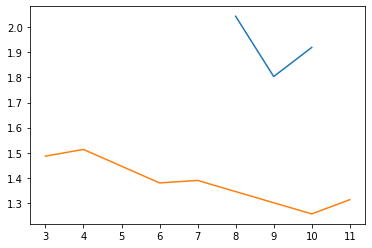

In [168]:
plt.plot(us_mean)
plt.plot(ca_mean)

In [367]:
elec_16= pd.read_csv("train/phase1/Election16.csv") 
# cvd_elec_16ca['date'] = cvd_ca.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').month, axis=1)        

In [368]:
elec_16['date'] = elec_16.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').date(), axis=1)

In [369]:
elec_16.head()

,time,text,target,date
0,Tue Jul 26 04:03:05 +0000 2016,RT @nytimes: Watch live: Bernie Sanders is spe...,3,2016-07-26
1,Tue Jul 26 04:22:31 +0000 2016,RT @Lehigh389: @LaPajamas Made in the USA.\nht...,2,2016-07-26
2,Tue Jul 26 03:00:32 +0000 2016,RT @Recode: Donald Trump is hosting a Reddit A...,3,2016-07-26
3,Wed Jul 27 21:28:28 +0000 2016,"""@DarakNy: Might be the greatest tweetstorm ev...",3,2016-07-27
4,Mon Jul 25 23:59:51 +0000 2016,RT @LindaSuhler: Sanders Delegates Revolt on C...,0,2016-07-25


In [377]:
elec_16_means = []

filter_ = [d.month <= 7 and d.day <= 21 and d.day >= 18 for d in elec_16['date']]
elec_16_means.append(elec_16[filter_]['target'].mean())

filter_ = [d.month <= 7 and d.day <= 28 and d.day >= 25 for d in elec_16['date']]
elec_16_means.append(elec_16[filter_]['target'].mean())

filter_ = [d.month == 9 and d.day == 26 for d in elec_16['date']]
elec_16_means.append(elec_16[filter_]['target'].mean())

filter_ = [d.month == 10 and d.day == 4 for d in elec_16['date']]
elec_16_means.append(elec_16[filter_]['target'].mean())

filter_ = [d.month == 10 and d.day == 9 for d in elec_16['date']]
elec_16_means.append(elec_16[filter_]['target'].mean())

filter_ = [d.month == 10 and d.day == 19 for d in elec_16['date']]
elec_16_means.append(elec_16[filter_]['target'].mean())

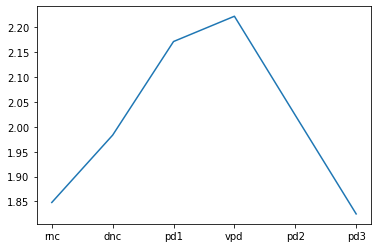

In [380]:
plt.plot(['rnc', 'dnc', 'pd1', 'vpd', 'pd2', 'pd3'], elec_16_means)

### Phase2

In [173]:
covid_pred= pd.read_csv("train/phase2/Covid_model_predict_new.csv")
elec_pred= pd.read_csv("train/phase2/Election_model_predict_new.csv")

In [176]:
covid_pred.head()

,time,text,label,processed_text,target
0,Thu Oct 22 18:23:59 +0000 2020,RT @BillOReilly: Lesley Stahl denies the econo...,covid,: Lesley Stahl denies the economy before the p...,1
1,Wed Oct 07 18:17:08 +0000 2020,RT @CaslerNoel: The first time I heard a story...,election,: The first time I heard a story about Trump r...,1
2,Wed Oct 21 18:20:29 +0000 2020,RT @seanhannity: BREAKING: Jim Jordan Says Sta...,election,: BREAKING: Jim Jordan Says Staff Has Independ...,1
3,Tue Oct 06 18:22:43 +0000 2020,RT @AntillanaSoy_: nobody recovers from COVID-...,covid,: nobody recovers from COVID-19 in days ... sp...,1
4,Tue Aug 18 18:01:22 +0000 2020,RT @phatpussymo: Like cool... but she’s dead a...,election,: Like cool... but shes dead and theres thousa...,1


In [177]:
elec_pred.head()

,time,text,label,processed_text,target
0,Tue Sep 29 18:54:18 +0000 2020,RT @lindyli: Remember: every accusation is a c...,election,: Remember: every accusation is a confession T...,1
1,Thu Oct 08 18:55:43 +0000 2020,"RT @doctor_oxford: There are 17,540 new cases ...",covid,: There are new cases of Covid today - more th...,2
2,Mon Sep 28 18:28:56 +0000 2020,If I was a customer at a retail establishment ...,covid,If I was a customer at a retail establishment ...,1
3,Tue Oct 06 18:18:15 +0000 2020,RT @elitelife_kd: Fought COVID for 3 days...th...,covid,: Fought COVID for days...then back to normal?...,1
4,Thu Oct 22 18:16:52 +0000 2020,"RT @imtoomuchnigga: Damn, y’all struggling! I...",covid,": Damn, yall struggling! Ivy Park is size incl...",1


In [178]:
sum(elec_pred['target'] != covid_pred['target'])

1012

In [179]:
len(elec_pred)

2317

In [180]:
diff_indices = elec_pred.index[elec_pred['target'] != covid_pred['target']]

In [195]:
covid_diff_pred = covid_pred.iloc[diff_indices, :]

In [197]:
covid_diff_pred.head()

,time,text,label,processed_text,target
1,Wed Oct 07 18:17:08 +0000 2020,RT @CaslerNoel: The first time I heard a story...,election,: The first time I heard a story about Trump r...,1
5,Tue Aug 25 18:23:18 +0000 2020,RT @RealWayneRoot: Fast emerging as HUGE issue...,election,: Fast emerging as HUGE issue election- COLLEG...,0
6,Wed Oct 21 18:15:12 +0000 2020,RT @SaraCarterDC: #CENSORSHIP \n\nSAY WHAT? Wa...,election,: SAY WHAT? Washington Post writer suggests Tw...,1
8,Wed Oct 21 18:14:55 +0000 2020,@Dr__Spaceman_ @KUSINews @JoeBiden @realDonald...,election,That isn't how taxes work..... not all taxes a...,1
10,Mon Sep 28 18:44:54 +0000 2020,RT @mmpadellan: I'm old enough to remember whe...,election,: I'm old enough to remember when was disrespe...,0


In [194]:
elec_diff_pred = elec_pred.iloc[diff_indices, :]
elec_diff_pred.head()

,time,text,label,processed_text,target
1,Thu Oct 08 18:55:43 +0000 2020,"RT @doctor_oxford: There are 17,540 new cases ...",covid,: There are new cases of Covid today - more th...,2
5,Fri Oct 23 18:27:12 +0000 2020,@ChadTheChud @kayleighmcenany @JoeBiden Electi...,election,Election show stop due to Bidens lies n crimin...,1
6,Tue Oct 06 18:32:19 +0000 2020,"RT @chakradhar_ias: Second 10,000 Litres oxyge...",covid,: Second Litres oxygen tank is set up today at...,2
8,Tue Oct 06 18:53:51 +0000 2020,RT @BillKristol: This is moving and powerful. ...,election,: This is moving and powerful. America is bett...,3
10,Wed Aug 19 18:33:21 +0000 2020,Over here trying to snag us some pandemic Wedd...,covid,Over here trying to snag us some pandemic Wedd...,1


In [199]:
covid_diff_pred['date'] = covid_diff_pred.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').date(), axis=1)        
elec_diff_pred['date'] = elec_diff_pred.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').date(), axis=1)        

/Users/xingu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/xingu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [202]:
covid_pred_means = covid_diff_pred.groupby('date').mean()
elec_pred_means = elec_diff_pred.groupby('date').mean()

In [209]:
covid_pred_means

,target
date,
2020-08-17,1.377358
2020-08-18,1.254545
2020-08-19,1.315068
2020-08-20,1.322581
2020-08-24,1.177419
2020-08-25,1.400000
2020-08-26,1.301887
2020-08-27,1.347826
2020-09-28,1.313725


In [210]:
elec_pred_means

,target
date,
2020-08-17,1.481481
2020-08-18,1.412698
2020-08-19,1.470588
2020-08-20,1.509091
2020-08-24,1.500000
2020-08-25,1.534483
2020-08-26,1.183673
2020-08-27,1.360000
2020-09-28,1.259259


### DNC

In [282]:
c_events_mean = []

In [283]:
e_events_mean = []

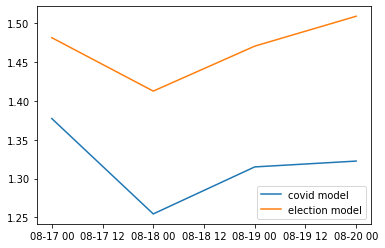

In [284]:
filter_ = [d.month == 8 and d.day <= 20 for d in covid_pred_means.index]
plt.plot(covid_pred_means[filter_], label="covid model")
plt.plot(elec_pred_means[filter_], label="election model")
plt.legend()

In [285]:
c_events_mean.append(covid_pred_means[filter_]['target'].mean())

In [286]:
e_events_mean.append(elec_pred_means[filter_]['target'].mean())

### RNC

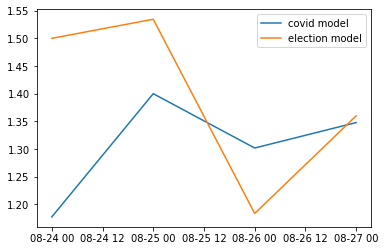

In [308]:
filter_ = [d.month == 8 and d.day <= 27 and d.day >= 24 for d in covid_pred_means.index]
plt.plot(covid_pred_means[filter_], label="covid model")
plt.plot(elec_pred_means[filter_], label="election model")
plt.legend()

In [309]:
c_events_mean.append(covid_pred_means[filter_]['target'].mean())

In [289]:
e_events_mean.append(elec_pred_means[filter_]['target'].mean())

### Presidential Debate I

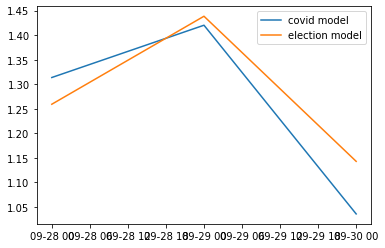

In [290]:
filter_ = [d.month == 9 and d.day <= 30 and d.day >= 28 for d in covid_pred_means.index]
plt.plot(covid_pred_means[filter_], label="covid model")
plt.plot(elec_pred_means[filter_], label="election model")
plt.legend()

In [291]:
c_events_mean.append(covid_pred_means[filter_]['target'].mean())

In [292]:
e_events_mean.append(elec_pred_means[filter_]['target'].mean())

### VP debate

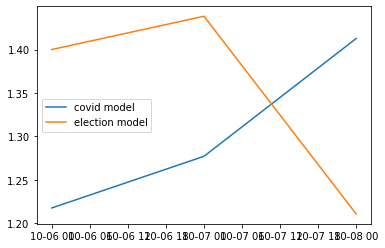

In [293]:
filter_ = [d.month == 10 and d.day <= 8 and d.day >= 6 for d in covid_pred_means.index]
plt.plot(covid_pred_means[filter_], label="covid model")
plt.plot(elec_pred_means[filter_], label="election model")
plt.legend()

In [294]:
c_events_mean.append(covid_pred_means[filter_]['target'].mean())

In [295]:
e_events_mean.append(elec_pred_means[filter_]['target'].mean())

### Presidential Debate II

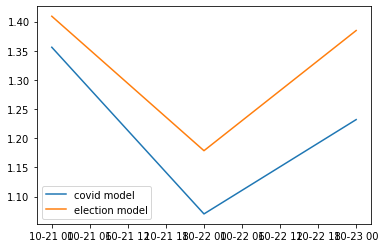

In [296]:
filter_ = [d.month == 10 and d.day <= 23 and d.day >= 21 for d in covid_pred_means.index]
plt.plot(covid_pred_means[filter_], label="covid model")
plt.plot(elec_pred_means[filter_], label="election model")
plt.legend()

In [297]:
c_events_mean.append(covid_pred_means[filter_]['target'].mean())

In [298]:
e_events_mean.append(elec_pred_means[filter_]['target'].mean())

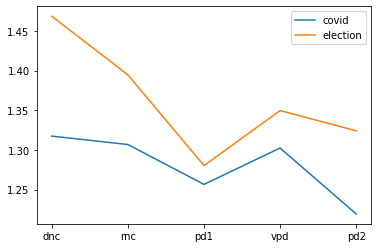

In [302]:
x_indices = ['dnc', 'rnc', 'pd1', 'vpd', 'pd2']
plt.plot(x_indices, c_events_mean, label='covid')
plt.plot(x_indices, e_events_mean, label='election')
plt.legend()

### Overall

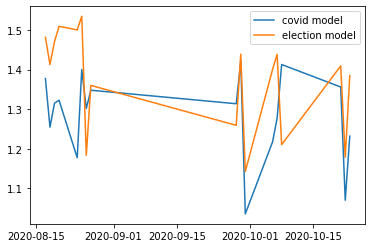

In [381]:
plt.plot(covid_pred_means.index, covid_pred_means, label="covid model")
plt.plot(elec_pred_means.index, elec_pred_means, label="election model")
plt.legend()

## Trend of Election

In [354]:
elec_subset = elec_pred[elec_pred['label'] == 'election']

In [355]:
elec_subset['date'] = elec_subset.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').date(), axis=1)

/Users/xingu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [356]:
elec_subset_mean = elec_subset.groupby('date').mean()

In [357]:
covid_subset = covid_pred[covid_pred['label'] != 'election']

In [358]:
covid_subset['date'] = covid_subset.apply(lambda row: datetime.datetime.strptime(row.time, '%a %b %d %H:%M:%S %z %Y').date(), axis=1)

/Users/xingu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [359]:
covid_subset_mean = covid_subset.groupby('date').mean()

### Before September

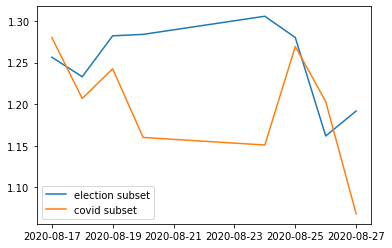

In [360]:
filter_ = [d.month < 9 for d in elec_subset_mean.index]
plt.plot(elec_subset_mean[filter_], label="election subset")
plt.plot(covid_subset_mean[filter_], label="covid subset")
plt.legend()

#### election model prediciton results

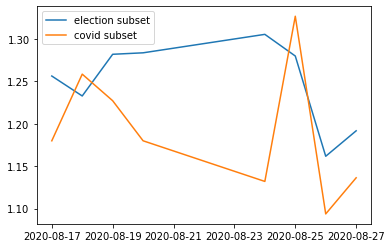

In [347]:
filter_ = [d.month < 9 for d in elec_subset_mean.index]
plt.plot(elec_subset_mean[filter_], label="election subset")
plt.plot(covid_subset_mean[filter_], label="covid subset")
plt.legend()

### Since September

#### covid model prediciton results

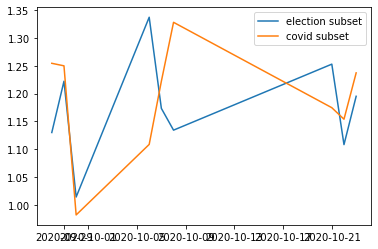

In [361]:
filter_ = [d.month >= 9 for d in elec_subset_mean.index]
plt.plot(elec_subset_mean[filter_], label="election subset")
plt.plot(covid_subset_mean[filter_], label="covid subset")
plt.legend()

#### election model prediciton results

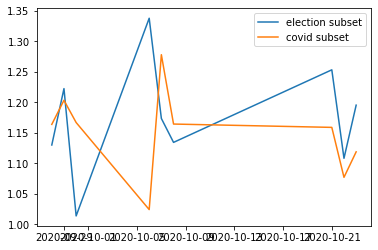

In [348]:
filter_ = [d.month >= 9 for d in elec_subset_mean.index]
plt.plot(elec_subset_mean[filter_], label="election subset")
plt.plot(covid_subset_mean[filter_], label="covid subset")
plt.legend()

### Compare the 'accuracy'

In [382]:
covid_pred= pd.read_csv("train/phase2/Covid_model_predict_new.csv")
elec_pred= pd.read_csv("train/phase2/Election_model_predict_new.csv")

In [383]:
covid_p1= pd.read_csv("train/phase1/Covid_US.csv")
elec_p1= pd.read_csv("train/phase1/Election20.csv")

In [387]:
elec_p1

,time,text,target
0,Mon Aug 17 18:31:45 +0000 2020,RT @DemConvention: We've always risen to our c...,3
1,Mon Aug 17 18:40:59 +0000 2020,RT @kleavitt: @monacharenEPPC @MaxBoot Part of...,1
2,Mon Aug 17 18:56:49 +0000 2020,RT @EricTrump: .@realDonaldTrump Boat Parade t...,2
3,Mon Aug 17 18:19:23 +0000 2020,RT @realDonaldTrump: Getting ready to land in ...,3
4,Mon Aug 17 18:52:43 +0000 2020,about mail in vs absentee voting is a lie. \nT...,1
...,...,...,...
1293,Fri Oct 23 18:50:53 +0000 2020,RT @DonaldJTrumpJr: Trump Foreign Policy: 🇺🇸🇺🇸...,3
1294,Fri Oct 23 18:58:51 +0000 2020,RT @kevinomccarthy: .@RealDonaldTrump has the ...,0
1295,Fri Oct 23 18:22:08 +0000 2020,My actionable plans on mental healthcare are b...,3
1296,Fri Oct 23 18:13:03 +0000 2020,RT @john_sipher: Your daily reminder. The Krem...,0


In [386]:
elec_pred

,time,text,label,processed_text,target
0,Tue Sep 29 18:54:18 +0000 2020,RT @lindyli: Remember: every accusation is a c...,election,: Remember: every accusation is a confession T...,1
1,Thu Oct 08 18:55:43 +0000 2020,"RT @doctor_oxford: There are 17,540 new cases ...",covid,: There are new cases of Covid today - more th...,2
2,Mon Sep 28 18:28:56 +0000 2020,If I was a customer at a retail establishment ...,covid,If I was a customer at a retail establishment ...,1
3,Tue Oct 06 18:18:15 +0000 2020,RT @elitelife_kd: Fought COVID for 3 days...th...,covid,: Fought COVID for days...then back to normal?...,1
4,Thu Oct 22 18:16:52 +0000 2020,"RT @imtoomuchnigga: Damn, y’all struggling! I...",covid,": Damn, yall struggling! Ivy Park is size incl...",1
...,...,...,...,...,...
2312,Fri Oct 23 18:13:03 +0000 2020,RT @john_sipher: Your daily reminder. The Krem...,election,: Your daily reminder. The Kremlin doesnt help...,1
2313,Thu Aug 27 18:51:25 +0000 2020,"RT @ReneeCarrollAZ: ""Say to Americans who love...",election,": ""Say to Americans who love our country, youn...",1
2314,Tue Sep 29 18:49:39 +0000 2020,RT @HKrassenstein: BREAKING: Judge Sullivan ju...,election,: BREAKING: Judge Sullivan just asked Michael ...,2
2315,Wed Aug 19 18:55:41 +0000 2020,RT @roinnslainte: WATCH: Acting Chief Medical ...,covid,: WATCH: Acting Chief Medical Officer Dr expla...,2
